/Users/bazilevs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


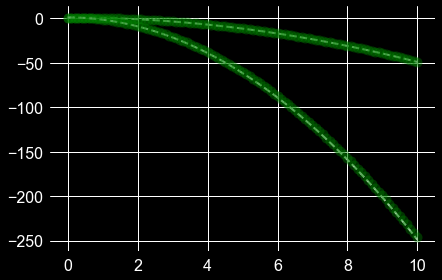

In [24]:
from scipy.integrate import odeint
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
plt.style.use('presentation')
# print(sol)

def f(y,t,k=2):
    dydt = -k*t
    return dydt

for k_global in [1,5]:
    y0=1.
    # b = -2.
    t = np.linspace(0, 10, 101)
    sol = odeint(f, y0, t,args=(k_global,))


    sol_hand = np.zeros(len(t))
    sol_hand[0] = y0
    dt = t[1] - t[0]
    for i in range(1,len(t)):
        sol_hand[i] = sol_hand[i-1] + dt*f(sol_hand[i-1],t[i-1],k=k_global)



    plt.plot(t, sol, 'w--', lw=2,label='odeint')
    plt.plot(t, sol_hand, 'go',alpha=0.4, label='not lazy python')

plt.show()


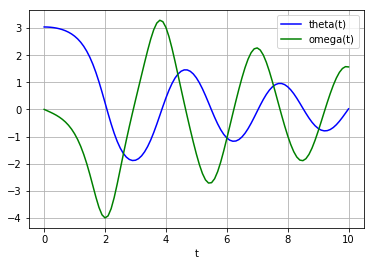

In [20]:
# theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0
# where b and c are positive constants, and a prime (‘) denotes a derivative. To solve this equation with odeint, we must first convert it to a system of first order equations. By defining the angular velocity omega(t) = theta'(t), we obtain the system:


# theta'(t) = omega(t)
# omega'(t) = -b*omega(t) - c*sin(theta(t))

# Let y be the vector [theta, omega]. We implement this system in python as:

# >>>
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

# We assume the constants are b = 0.25 and c = 5.0:

# >>>
b = 0.25
c = 5.0
# For initial conditions, we assume the pendulum is nearly vertical with theta(0) = pi - 0.1, and it initially at rest, so omega(0) = 0. Then the vector of initial conditions is

# >>>
y0 = [np.pi - 0.1, 0.0]
# We generate a solution 101 evenly spaced samples in the interval 0 <= t <= 10. So our array of times is:

# >>>
t = np.linspace(0, 10, 101)
# Call odeint to generate the solution. To pass the parameters b and c to pend, we give them to odeint using the args argument.

# >>>
from scipy.integrate import odeint
sol = odeint(pend, y0, t, args=(b, c))
# The solution is an array with shape (101, 2). The first column is theta(t), and the second is omega(t). The following code plots both components.

# >>>
import matplotlib.pyplot as plt
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()